In [1]:
import pandapower as pp
import pandapower.networks as nw
import pandapower.plotting as plot
import matplotlib.pyplot as plt
import math
import numpy as np
import copy
import pandapower.shortcircuit as sc
import pandapower.control as ct
import statistics as stat
#from matplotlib.transforms import BlendedGenericTransform
#from pandapower.plotting import simple_plot, simple_plotly, pf_res_plotly

# Predefined network of IEEE 4gs bus system 
net_temp = pp.networks.case4gs()
#plot.simple_plot(net)

In [2]:
#COPY PARAMETERS FROM TEMP NETWORK TO USE IN 2 BUS RADIAL SYSTEM.
#BUSES
b0_in_service = net_temp.bus.in_service[0]
b0_max_vm_pu = net_temp.bus.max_vm_pu[0]
b0_min_vm_pu = net_temp.bus.min_vm_pu[0]
b0_name = net_temp.bus.name[0]
b0_type = net_temp.bus.type[0]
b0_vn_kv = net_temp.bus.vn_kv[0]
b0_zone = net_temp.bus.zone[0]
b0_geodata = (3,2)

b1_in_service = net_temp.bus.in_service[1]
b1_max_vm_pu = net_temp.bus.max_vm_pu[1]
b1_min_vm_pu = net_temp.bus.min_vm_pu[1]
b1_name = net_temp.bus.name[1]
b1_type = net_temp.bus.type[1]
b1_vn_kv = net_temp.bus.vn_kv[1]
b1_zone = net_temp.bus.zone[1]
b1_geodata = (4,2)

#BUS ELEMENTS
load_bus = net_temp.load.bus[1]
load_in_service = net_temp.load.in_service[1]
load_p_mw = net_temp.load.p_mw[1]
load_q_mvar = net_temp.load.q_mvar[1]
load_scaling = net_temp.load.scaling[1]

extGrid_bus = net_temp.ext_grid.bus[0]
extGrid_in_service = net_temp.ext_grid.in_service[0]
extGrid_va_degree = net_temp.ext_grid.va_degree[0]
extGrid_vm_pu = net_temp.ext_grid.vm_pu[0]
extGrid_max_p_mw = net_temp.ext_grid.max_p_mw[0]
extGrid_min_p_mw = net_temp.ext_grid.min_p_mw[0]
extGrid_max_q_mvar = net_temp.ext_grid.max_q_mvar[0]
extGrid_min_q_mvar = net_temp.ext_grid.min_q_mvar[0]

#LINES
line0_scaling = 1
line0_c_nf_per_km = net_temp.line.c_nf_per_km[0]
line0_df = net_temp.line.df[0]
line0_from_bus = net_temp.line.from_bus[0]
line0_g_us_per_km = net_temp.line.g_us_per_km[0]
line0_in_service = net_temp.line.in_service[0]
line0_length_km = net_temp.line.length_km[0]
line0_max_i_ka = net_temp.line.max_i_ka[0]
line0_max_loading_percent = net_temp.line.max_loading_percent[0]
line0_parallel = net_temp.line.parallel[0]
line0_r_ohm_per_km = net_temp.line.r_ohm_per_km[0] * line0_scaling
line0_to_bus = net_temp.line.to_bus[0]
line0_type = net_temp.line.type[0]
line0_x_ohm_per_km = net_temp.line.x_ohm_per_km[0] * line0_scaling


line1_scaling = 1.2
line1_c_nf_per_km = line0_c_nf_per_km
line1_df = line0_df
line1_from_bus = line0_from_bus 
line1_g_us_per_km = line0_g_us_per_km
line1_in_service = line0_in_service
line1_length_km = line0_length_km
line1_max_i_ka = line0_max_i_ka
line1_max_loading_percent = line0_max_loading_percent
line1_parallel = line0_parallel 
line1_r_ohm_per_km = line0_r_ohm_per_km
line1_to_bus = line0_to_bus
line1_type = line0_type
line1_x_ohm_per_km = line0_x_ohm_per_km * line1_scaling
print(load_p_mw)
print(load_q_mvar)

170.0
105.35000000000001


In [3]:
#CREATE 2 BUS SYSTEM
net_2b = pp.create_empty_network()

#Create buses
b0 = pp.create_bus(net_2b, in_service=b0_in_service, max_vm_pu=b0_max_vm_pu, min_vm_pu=b0_min_vm_pu, 
                   name=b0_name, type=b0_type, vn_kv=b0_vn_kv, zone= b0_zone, geodata=b0_geodata)

b1 = pp.create_bus(net_2b, in_service=b1_in_service, max_vm_pu=b1_max_vm_pu, min_vm_pu=b1_min_vm_pu, 
                   name=b1_name, type=b1_type, vn_kv=b1_vn_kv, zone= b1_zone, geodata=b1_geodata)



#Create bus elements
load = pp.create_load(net_2b, bus=load_bus, in_service=load_in_service, 
                      p_mw=load_p_mw, q_mvar=load_q_mvar, scaling=load_scaling)

extGrid = pp.create_ext_grid(net_2b, bus=extGrid_bus, in_service=extGrid_in_service, va_degree=extGrid_va_degree,
                             vm_pu=extGrid_vm_pu, max_p_mw=extGrid_max_p_mw, min_p_mw=extGrid_min_p_mw,
                             max_q_mvar=extGrid_max_q_mvar, min_q_mvar=extGrid_min_q_mvar)

# Create lines
l0 = pp.create_line_from_parameters(net_2b, c_nf_per_km=line0_c_nf_per_km, df=line0_df, from_bus=line0_from_bus,
                   g_us_per_km=line0_g_us_per_km, in_service=line0_in_service, length_km=line0_length_km,
                   max_i_ka=line0_max_i_ka, max_loading_percent=line0_max_loading_percent,
                   parallel=line0_parallel, r_ohm_per_km=line0_r_ohm_per_km, to_bus=line0_to_bus, 
                   type=line0_type, x_ohm_per_km=line0_x_ohm_per_km)

l1 = pp.create_line_from_parameters(net_2b, c_nf_per_km=line1_c_nf_per_km, df=line1_df, from_bus=line1_from_bus,
                   g_us_per_km=line1_g_us_per_km, in_service=line1_in_service, length_km=line1_length_km,
                   max_i_ka=line1_max_i_ka, max_loading_percent=line1_max_loading_percent,
                   parallel=line1_parallel, r_ohm_per_km=line1_r_ohm_per_km, to_bus=line1_to_bus, 
                   type=line1_type, x_ohm_per_km=line1_x_ohm_per_km)

In [4]:
####Shunt FACTS device (bus 1)
#MV bus
bus_SVC = pp.create_bus(net_2b, name='MV SVCtrafo bus', vn_kv=69, type='n', geodata=(4.04,1.98), zone=2, max_vm_pu=1.1,
                        min_vm_pu=0.9)
#Trafo
trafoSVC = pp.create_transformer_from_parameters(net_2b, hv_bus=1, lv_bus=2, in_service=True, 
                                                name='trafoSVC', sn_mva=110, vn_hv_kv=230 , vn_lv_kv=69, 
                                                vk_percent=12, vkr_percent=0.26, pfe_kw=55, i0_percent=0.06,
                                                shift_degree=0, tap_side='hv', tap_neutral=0, tap_min=-9, tap_max=9,
                                                tap_step_percent=1.5, tap_step_degree=0, tap_phase_shifter=False) 
#Breaker between grid HV bus and trafo HV bus to connect buses
sw_SVC = pp.create_switch(net_2b, bus=1, element=0, et='t', type='CB', closed=False)
#Shunt devices connected with MV bus
shuntDev = pp.create_shunt(net_2b, bus_SVC, 2, in_service=True, name='Shunt Device', step = 1)

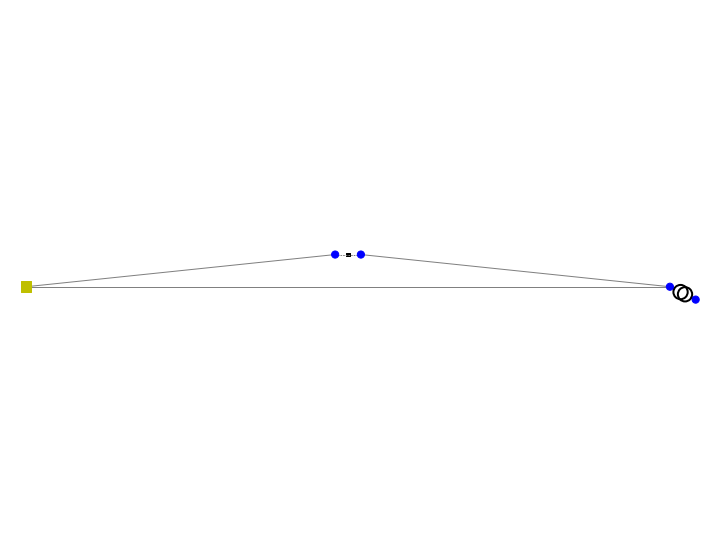

In [5]:
####Series device (at line 1, in middle between bus 0 and 1)
#Add intermediate buses for bypass and series compensation impedance
bus_SC1 = pp.create_bus(net_2b, name='SC bus 1', vn_kv=230, type='n', geodata=(3.48,2.05), 
                        zone=2, max_vm_pu=1.1, min_vm_pu=0.9)
bus_SC2 = pp.create_bus(net_2b, name='SC bus 2', vn_kv=230, type='n', geodata=(3.52,2.05), 
                        zone=2, max_vm_pu=1.1, min_vm_pu=0.9)
sw_SC_bypass = pp.create_switch(net_2b, bus=3, element=4, et='b', type='CB', closed=True)
imp_SC = pp.create_impedance(net_2b, from_bus=3, to_bus=4, rft_pu=0.0000001272, xft_pu=-0.0636,
                             rtf_pu=0.0000001272, xtf_pu=-0.0636, sn_mva=250, in_service=True) #Just some default values
#Adjust orginal Line 3 to connect to new buses instead.
net_2b.line.at[1, ['length_km', 'to_bus', 'name']] = [0.5, 3, 'line1_SC']                        
lineSC2 = pp.create_line_from_parameters(net_2b, name='line2_SC', c_nf_per_km=net_2b.line.at[1,'c_nf_per_km'],
                       df=net_2b.line.at[1, 'df'], from_bus=4, g_us_per_km=net_2b.line.at[1, 'g_us_per_km'],
                       in_service=net_2b.line.at[1, 'in_service'], length_km=0.5, max_i_ka=net_2b.line.at[1, 'max_i_ka'],
                       max_loading_percent=net_2b.line.at[1, 'max_loading_percent'], parallel=net_2b.line.at[1, 'parallel'],
                       r_ohm_per_km=net_2b.line.at[1, 'r_ohm_per_km'], std_type=net_2b.line.at[1, 'std_type'], to_bus=1, 
                       type=net_2b.line.at[1, 'type'], x_ohm_per_km=net_2b.line.at[1, 'x_ohm_per_km'])
plot.simple_plot(net_2b)

In [6]:
##Function to calculate line reactance in pu
def X_pu(net, line_index):  
    s_base = 100e6
    v_base = 230e3
    x_base = pow(v_base,2) / s_base
    x_line_ohm = net_2b.line.x_ohm_per_km[line_index]
    x_line_pu = x_line_ohm / x_base # Can take one since this line is divivded into 
                                                  # 2 identical lines with length 0.5 km
    return x_line_pu

In [7]:
##Function to calculate loadingt percentage reference for the series compensation
def LP_ref(net, line_index):
    lp_ref = stat.mean(net.res_line.loading_percent)
    return lp_ref  

In [8]:
##Function to return a reference network with FACTS devices disabled with results aquired after pp.runpp()
def Net_copy_noFACTS(net):
    network = copy.deepcopy(net) #To not changing anything in actual network
    network.switch.closed[0] = False 
    network.switch.closed[1] = True
    pp.runpp(network)
    return network

In [9]:
##Function for transition from reference power to reactance of "TCSC"
def K_x_comp_pu(net, loading_perc_ref, line_index, k_old): 
    #line_from_bus = net.line.from_bus[line_index]
    #line_to_bus = net.line.to_bus[line_index]
    
    #x_line_pu = X_pu(net, line_index)

    #k_x_comp_max_ind = 0.4 #maximum inductive reactance compensation of the line
    #k_x_comp_max_cap = -0.4 #maximum capacitive reactance compensation of the line
    #v_s_pu = net.res_bus.vm_pu[line_from_bus]
    #v_r_pu = net.res_bus.vm_pu[line_to_bus]
    #delta_deg = net.res_bus.va_degree[line_from_bus] - net.res_bus.va_degree[line_to_bus]
    #k_delta = ((v_s_pu * v_r_pu * math.sin(math.radians(delta_deg))) / (p_ref_pu* x_line_pu)) - 1 - k_old
    #k_x_comp = k_delta + k_old
    #print(k_x_comp)
    
    ##NEW VERSION TEST:
    c = 5 #Coefficient for transnition tuned to hit equal load sharing at nominal IEEE
    k_x_comp_max_ind = 0.4
    k_x_comp_max_cap = -k_x_comp_max_ind
    loading_perc_meas = net.res_line.loading_percent[line_index]
    k_delta = (c * k_x_comp_max_ind * (loading_perc_meas - loading_perc_ref) / 100) - k_old #100 To get percentage in pu
    k_x_comp = k_delta + k_old
    
    #Bypassing series device if impedance close to 0
    if abs(k_x_comp) < 0.0001: #Helping with convergence
        net.switch.closed[1] = True  #ACTUAL network, not a copy
    
    if k_x_comp > k_x_comp_max_ind:
        k_x_comp = k_x_comp_max_ind
    if k_x_comp < k_x_comp_max_cap:
        k_x_comp = k_x_comp_max_cap
    return k_x_comp

In [10]:
##Function for transition from reference parameter to reactive power output of shunt device
def Shunt_q_comp(net, v_ref_pu, bus_index, q_old):   
    v_bus_pu = net.res_bus.vm_pu[bus_index]
    k = 10 #Coefficient for transition,
    q_rated = 100 #Mvar
    q_min = -q_rated
    q_max = q_rated
    q_delta = k*q_rated*(v_bus_pu-v_ref_pu)-q_old #q_old might come in handy later with RL if able to take actions without 
                                                  #independent change in environment
    q_comp = q_delta + q_old
    
    if q_comp > q_max:
        q_comp = q_max
    if q_comp < q_min:
        q_comp = q_min
    
    #print(q_comp)
    return q_comp

In [11]:
##Function for nose curve
def NoseCurve(bus_index, net, shunt, sc, line_load_limit):
    network = Net_copy_noFACTS(net) #To not changing anything in actual network
    fig = plt.figure()
    
    load_increment = 0.02
    load_start = 0.1
    load_prev = 0.1 - load_increment
    l_arr = np.array([])
    v_res = np.array([])
    l_ind = 0
    line_ind = 1
    l_p_mw = network.load.p_mw[l_ind]
    l_q_mvar = network.load.q_mvar[l_ind]
    x_line_pu = X_pu(network, 1)
    k_old = 0 #initialise as 0
    q_old = 0
    networkFailure = False
        
    while not networkFailure: 
        #Scaling
        l_scaling = load_prev + load_increment
        load_prev = l_scaling
        network.load.p_mw[l_ind] = l_p_mw*l_scaling
        network.load.q_mvar[l_ind] = l_q_mvar*l_scaling
        
        try:            
            pp.runpp(network)
            
            # Enable FACTS devices if they should be
            network.switch.closed[0] = shunt 
            if sc == True:
                network.switch.closed[1] = False
            else: 
                network.switch.closed[1] = True
            
            # Shunt compensation
            v_ref_pu = 1
            q_comp = Shunt_q_comp(network, v_ref_pu, bus_index, q_old)
            network.shunt.q_mvar =  q_comp
            #print(network.shunt.q_mvar)

            # Series compensation
            i_ref = 41.12944816652619#45.12148693231915 #Should be changed every X time steps to emulate 
                                      #change by system operator when implemented in RL.
            k_x_comp_pu = K_x_comp_pu(network, i_ref, line_ind, k_old)
            network.impedance.loc[0, ['xft_pu','xtf_pu']] = x_line_pu * k_x_comp_pu
            #print(k_x_comp_pu)
        
            pp.runpp(network)
            
            if len([x for x in network.res_line.loading_percent if x >line_load_limit])>0:
                networkFailure=True;
                print('Nosecurve stop: line load limit reached')
            if not networkFailure:
                v_res = np.append(v_res, network.res_bus.vm_pu[bus_index])    
                l_arr = np.append(l_arr, l_scaling)
                q_old = q_comp #update for next iter
                k_old = k_x_comp_pu 
        except:
            networkFailure=True
            print('Nosecurve stop: runpp diverge')
        
        # Reset FACTS devices to get proper transition next time step.
        network.switch.closed[0] = False 
        network.switch.closed[1] = True

    plt.plot(l_arr, v_res, figure=fig)
    plt.ylabel('Bus Voltage [pu]')
    plt.xlabel('Active power [pu]')
    plt.grid(True)
    
    return [fig, v_res, l_arr]

In [12]:
##Function to merge figures into 1
def MergeFig(v_res1, l_arr1, label1, v_res2, l_arr2, label2, v_res3, l_arr3, label3):
    fig = plt.figure()
    plt.plot(l_arr1, v_res1, figure=fig, label=label1)
    plt.plot(l_arr2, v_res2, figure=fig, label=label2)
    plt.plot(l_arr3, v_res3, figure=fig, label=label3)
    plt.ylabel('Bus Voltage [pu]')
    plt.xlabel('Active power load at bus [scaling relative to nominal IEEE]')
    plt.grid(True)
    plt.legend()
    return fig    

In [13]:
#SETTINGS
pp.runpp(net_2b)
lp_ref = LP_ref(net_2b,0)# P_ref(Net_copy_noFACTS(net_2b), 0)
print(lp_ref)

40.09638004916377


In [14]:
net_2b.switch.closed[0] = True
x_line_pu = X_pu(net_2b, 1)
q_old = 0
bus_index = 1
v_ref_pu = 1
q_comp = Shunt_q_comp(net_2b, v_ref_pu, bus_index, q_old)
net_2b.shunt.q_mvar = q_comp
pp.runpp(net_2b)

In [15]:
net_2b.res_shunt

,p_mw,q_mvar,vm_pu
0,0.0,-38.886821,1.014932


In [16]:
net_2b.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.000000,0.000000,-171.833532,-60.908073
1,0.973165,-2.574409,170.000000,105.350000
2,1.014932,-2.629459,0.000000,-38.886821
3,0.986971,-1.275866,0.000000,0.000000
4,0.986971,-1.275866,0.000000,0.000000


In [17]:
net_2b.res_line.loading_percent

0    40.882344
1    33.800907
2    34.438744
Name: loading_percent, dtype: float64

In [18]:
net_2b.res_shunt

,p_mw,q_mvar,vm_pu
0,0.0,-38.886821,1.014932


In [19]:
k_x_comp_pu = K_x_comp_pu(net_2b, i_ref, 1, 0)
k_x_comp_pu

NameError: name 'i_ref' is not defined

In [ ]:
l_ind = 0
l_scaling = 2.22
l_p_mw = net_2b.load.p_mw[l_ind]
l_q_mvar = net_2b.load.q_mvar[l_ind]
net_2b.load.p_mw[l_ind] = l_p_mw*l_scaling
net_2b.load.q_mvar[l_ind] = l_q_mvar*l_scaling
pp.runpp(net_2b)

In [ ]:
net_2b.res_bus

In [ ]:
net_2b.res_line

In [ ]:
k_x_comp_pu = K_x_comp_pu(net_2b, i_ref, 1, 0)
k_x_comp_pu

In [ ]:
net_2b.switch.closed[1] = False
net_2b.impedance.loc[0, ['xft_pu','xtf_pu']] = x_line_pu * k_x_comp_pu
pp.runpp(net_2b)
net_2b.res_bus

In [ ]:
net_2b.res_line

In [ ]:
l_ind = 0
l_scaling = 1/l_scaling #Scale back to nominal before nose curves
l_p_mw = net_2b.load.p_mw[l_ind]
l_q_mvar = net_2b.load.q_mvar[l_ind]
net_2b.load.p_mw[l_ind] = l_p_mw*l_scaling
net_2b.load.q_mvar[l_ind] = l_q_mvar*l_scaling


l_load_limit = 100
NoseCurve1 = NoseCurve(1, net_2b, shunt=False, sc=False, line_load_limit=l_load_limit)
print(NoseCurve1[2][len(NoseCurve1[2])-1])
NoseCurve2 = NoseCurve(1, net_2b, shunt=True, sc=False, line_load_limit=l_load_limit)
print(NoseCurve2[2][len(NoseCurve2[2])-1])
NoseCurve3 = NoseCurve(1, net_2b, shunt=True, sc=True, line_load_limit=l_load_limit)
print(NoseCurve3[2][len(NoseCurve3[2])-1])
figMerge1 = MergeFig(NoseCurve1[1], NoseCurve1[2], 'No FACTS', 
                     NoseCurve2[1], NoseCurve2[2], 'Shunt',
                     NoseCurve3[1], NoseCurve3[2], 'Shunt+SC')


In [ ]:
net_2b.trafo

In [ ]:
45.12148693231915/.37430556

In [ ]:
pp.runpp(net_2b)
print(net_2b.trafo.tap_pos)
print(net_2b.res_bus)
trafo_control = ct.DiscreteTapControl(net=net_2b, tid=0,vm_lower_pu=0.95, vm_upper_pu=1.05)
pp.runpp(net_2b, run_control=True)
print(net_2b.trafo.tap_pos)
print(net_2b.res_bus)

In [ ]:
net_2b.res_line

In [ ]:
 # Shunt compensation
v_ref_pu = 0.8
q_comp = Shunt_q_comp(net_2b, v_ref_pu, bus_index, 0)
net_2b.shunt.q_mvar =  q_comp
#print(network.shunt.q_mvar)

# Series compensation
i_ref = 15#41.12944816652619#45.12148693231915 #Should be changed every X time steps to emulate 
                          #change by system operator when implemented in RL.
k_x_comp_pu = K_x_comp_pu(net_2b, i_ref, 1, 0)
net_2b.impedance.loc[0, ['xft_pu','xtf_pu']] = x_line_pu * k_x_comp_pu
#print(k_x_comp_pu)

pp.runpp(net_2b)
print(k_x_comp_pu)
print(q_comp)
print(net_2b.res_bus.vm_pu)
print(net_2b.res_line.loading_percent)

In [ ]:
v_bus_pu = 0.9531755470079166
v_ref_pu =1.2
loading_perc_meas = 45.48088581072245
loading_perc_ref =135

c = 5 #Coefficient for transnition tuned to hit equal load sharing at nominal IEEE
k_x_comp_max_ind = 0.4
k = 10 #Coefficient for transition,
q_rated = 100 #Mvar

k_delta = (c * k_x_comp_max_ind * (loading_perc_meas - loading_perc_ref) / 100)
q_delta = k*q_rated*(v_bus_pu-v_ref_pu)
print(k_delta)
print(q_delta)

In [ ]:
import numpy as np
V=[0.8, 0.85, 1.0, 0.9, 1.1]
L=[1.2, 1.15, 1.0, 1.1, 0.9 ]
print(V)
print(L)
Vsorted = [x for _, x in sorted(zip(L,V))]
print(Vsorted)
Lsorted = sorted(L)
print(Lsorted)

In [ ]:
Ltrim = [x for x in L if x <= 1]
print(Ltrim)

In [ ]:
V[0:2]

In [1]:
A = B = C= 0

2
0
